In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import describe
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('survey lung cancer.csv')
np.random.seed(0)
data.head()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [19]:
# Display basic statistics
print(data.describe())


              AGE     SMOKING  YELLOW_FINGERS     ANXIETY  PEER_PRESSURE  \
count  309.000000  309.000000      309.000000  309.000000     309.000000   
mean    62.673139    1.563107        1.569579    1.498382       1.501618   
std      8.210301    0.496806        0.495938    0.500808       0.500808   
min     21.000000    1.000000        1.000000    1.000000       1.000000   
25%     57.000000    1.000000        1.000000    1.000000       1.000000   
50%     62.000000    2.000000        2.000000    1.000000       2.000000   
75%     69.000000    2.000000        2.000000    2.000000       2.000000   
max     87.000000    2.000000        2.000000    2.000000       2.000000   

       CHRONIC DISEASE    FATIGUE     ALLERGY     WHEEZING  ALCOHOL CONSUMING  \
count       309.000000  309.000000  309.000000  309.000000         309.000000   
mean          1.504854    1.673139    1.556634    1.556634           1.556634   
std           0.500787    0.469827    0.497588    0.497588           0.4

In [3]:


# Map gender values from M/F to Male/Female
data['GENDER'] = data['GENDER'].map({'M': 'Male', 'F': 'Female'})


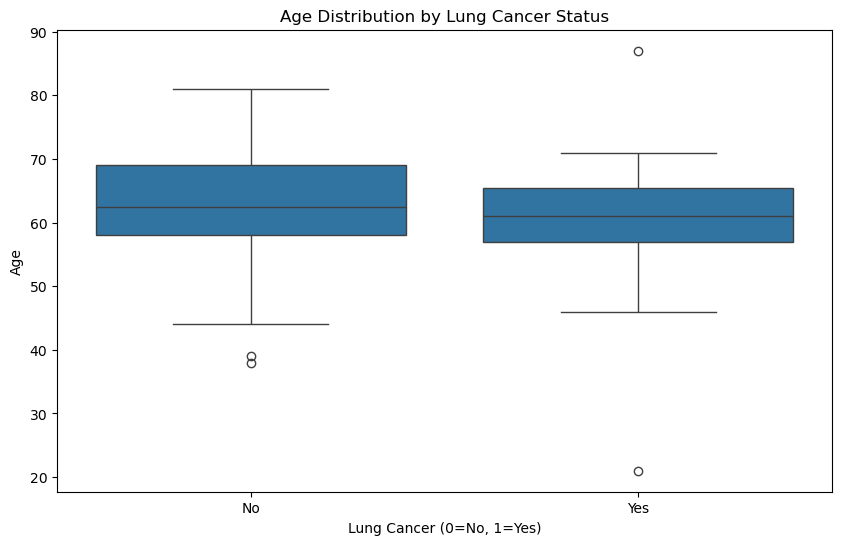

In [4]:
# Create a box plot for age distribution by lung cancer status
plt.figure(figsize=(10, 6))
sns.boxplot(x='LUNG_CANCER', y='AGE', data=data)
plt.title('Age Distribution by Lung Cancer Status')
plt.xlabel('Lung Cancer (0=No, 1=Yes)')
plt.ylabel('Age')
plt.xticks([0, 1], ['No', 'Yes'])  # Set x-tick labels for clarity
plt.show()


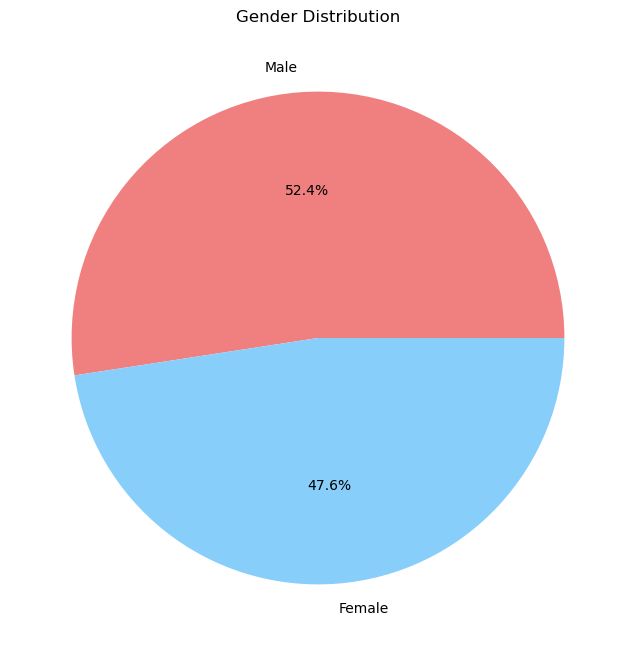

In [5]:
gender_counts = data['GENDER'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Gender Distribution')
plt.show()


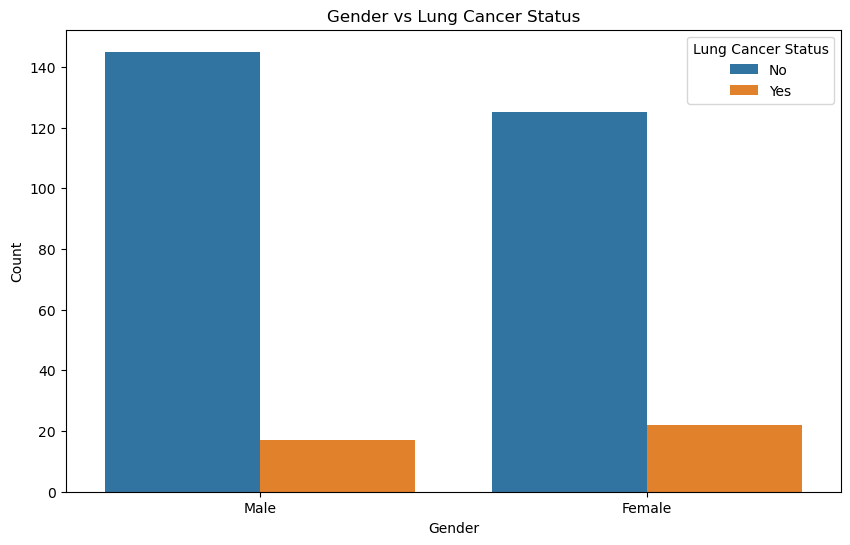

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(x='GENDER', hue='LUNG_CANCER', data=data)
plt.title('Gender vs Lung Cancer Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Lung Cancer Status', labels=['No', 'Yes'])
plt.show()


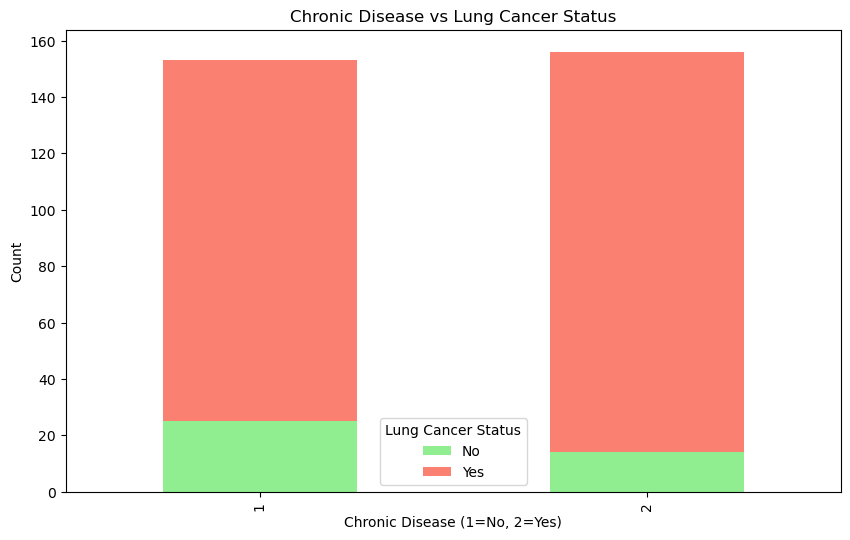

In [7]:
chronic_cancer = data.groupby('CHRONIC DISEASE')['LUNG_CANCER'].value_counts().unstack()
chronic_cancer.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightgreen', 'salmon'])
plt.title('Chronic Disease vs Lung Cancer Status')
plt.xlabel('Chronic Disease (1=No, 2=Yes)')
plt.ylabel('Count')
plt.legend(title='Lung Cancer Status', labels=['No', 'Yes'])
plt.show()


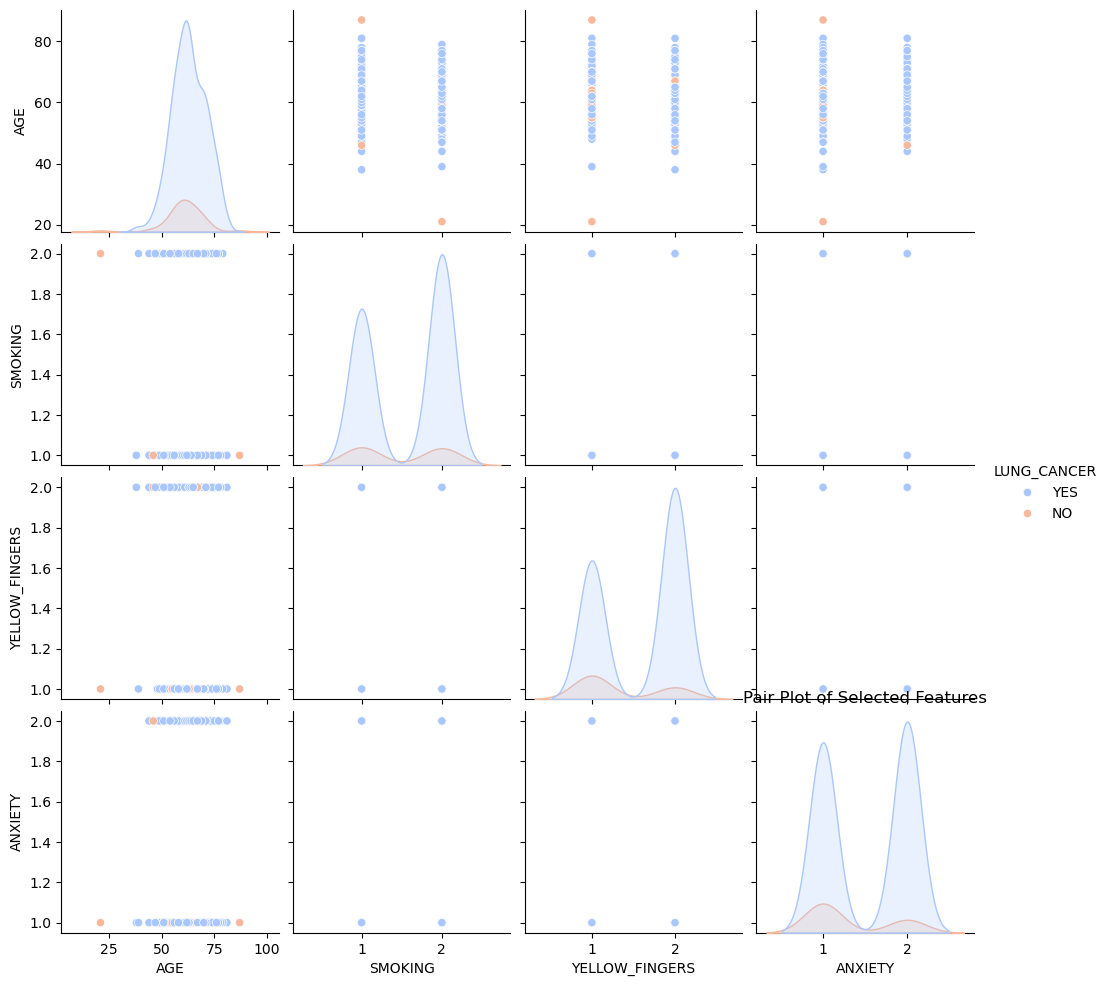

In [8]:
selected_features = ['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'LUNG_CANCER']
sns.pairplot(data[selected_features], hue='LUNG_CANCER', palette='coolwarm')
plt.title('Pair Plot of Selected Features')
plt.show()


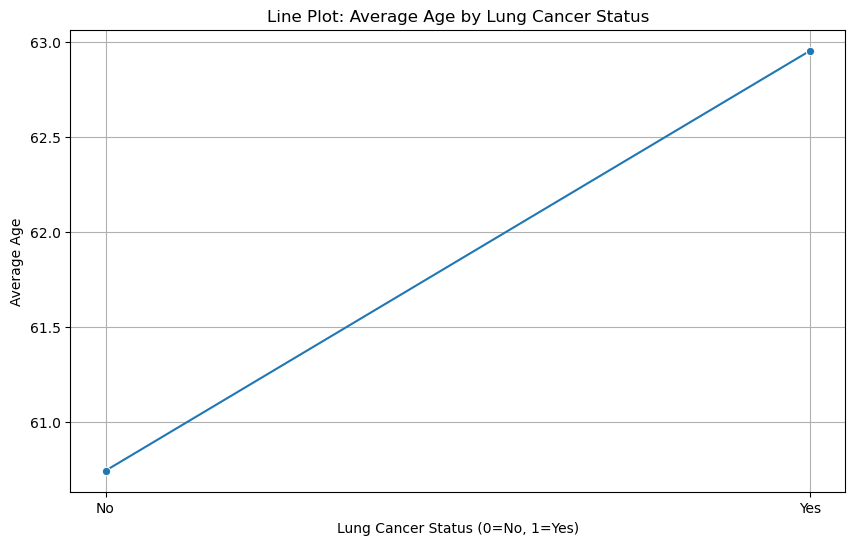

In [10]:
# Calculate average age by lung cancer status
average_age = data.groupby('LUNG_CANCER')['AGE'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='LUNG_CANCER', y='AGE', data=average_age, marker='o')
plt.title('Line Plot: Average Age by Lung Cancer Status')
plt.xlabel('Lung Cancer Status (0=No, 1=Yes)')
plt.ylabel('Average Age')
plt.xticks([0, 1], ['No', 'Yes'])  # Set x-tick labels for clarity
plt.grid(True)
plt.show()


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import describe
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset from the provided CSV file
data_url = 'survey lung cancer.csv'  # Ensure this is the correct path to your CSV file
data = pd.read_csv(data_url)

# Map gender values from M/F to Male/Female (if needed for visualization)
data['GENDER'] = data['GENDER'].map({'M': 'Male', 'F': 'Female'})

# Convert categorical variables to numerical values
data['GENDER'] = data['GENDER'].map({'Male': 0, 'Female': 1})  # Convert gender to numerical
data['LUNG_CANCER'] = data['LUNG_CANCER'].map({'NO': 0, 'YES': 1})  # Convert lung cancer status

# Define features and target variable
X = data.drop(columns=['LUNG_CANCER'])
y = data['LUNG_CANCER']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Function for user input prediction
def predict_lung_cancer():
    print("Enter the following details:")
    try:
        age = int(input("Age: "))
        gender = int(input("Gender (Male=0, Female=1): "))
        smoking = int(input("Smoking (No=1, Yes=2): "))
        yellow_fingers = int(input("Yellow Fingers (No=1, Yes=2): "))
        anxiety = int(input("Anxiety (No=1, Yes=2): "))
        peer_pressure = int(input("Peer Pressure (No=1, Yes=2): "))
        chronic_disease = int(input("Chronic Disease (No=1, Yes=2): "))
        fatigue = int(input("Fatigue (No=1, Yes=2): "))
        allergy = int(input("Allergy (No=1, Yes=2): "))
        wheezing = int(input("Wheezing (No=1, Yes=2): "))
        alcohol_consuming = int(input("Alcohol Consuming (No=1, Yes=2): "))
        coughing = int(input("Coughing (No=1, Yes=2): "))
        shortness_of_breath = int(input("Shortness of Breath (No=1, Yes=2): "))
        swallowing_difficulty = int(input("Swallowing Difficulty (No=1, Yes=2): "))
        chest_pain = int(input("Chest Pain (No=1, Yes=2): "))

        user_data = np.array([[age, gender, smoking, yellow_fingers,
                               anxiety, peer_pressure, chronic_disease,
                               fatigue, allergy, wheezing,
                               alcohol_consuming, coughing,
                               shortness_of_breath,
                               swallowing_difficulty,
                               chest_pain]])
        
        prediction = knn.predict(user_data)
        print("Prediction: Lung Cancer" if prediction[0] == 1 else "Prediction: No Lung Cancer")
    
    except ValueError as e:
        print(f"Invalid input: {e}")

# Call the function for user input prediction
predict_lung_cancer()


Model Accuracy: 95.16%
Enter the following details:


Age:  34
Gender (Male=0, Female=1):  0
Smoking (No=1, Yes=2):  1
Yellow Fingers (No=1, Yes=2):  2
Anxiety (No=1, Yes=2):  1
Peer Pressure (No=1, Yes=2):  2
Chronic Disease (No=1, Yes=2):  1
Fatigue (No=1, Yes=2):  2
Allergy (No=1, Yes=2):  2
Wheezing (No=1, Yes=2):  2
Alcohol Consuming (No=1, Yes=2):  2
Coughing (No=1, Yes=2):  1
Shortness of Breath (No=1, Yes=2):  2
Swallowing Difficulty (No=1, Yes=2):  1
Chest Pain (No=1, Yes=2):  2


Prediction: Lung Cancer


D:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
